In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
from input.plot_styles import family_colors, set_plot_style, model_order

In [2]:
set_plot_style()

In [11]:
model_dict = {"qwen8":"Qwen/Qwen3-8B",
             "qwen14": "Qwen/Qwen3-14B",
             "gemma12": "google/gemma-3-12b-it",
             "gemma27": "google/gemma-3-27b-it",
             "llama8": "meta-llama/Llama-3.1-8B-Instruct",
             "ministral14": "mistralai/Ministral-3-14B-Instruct-2512",
             "ministral8": "mistralai/Ministral-3-8B-Instruct-2512"}

### Loading Data

In [3]:
def load_results_to_dict(num_mails, urgent=True):
    subfolder = "urgent" if urgent else "not_urgent"
    directory = f"results/results_choice/{num_mails}/{subfolder}"
    
    df_dict = {}
    
    # Check if directory exists
    if not os.path.exists(directory):
        print(f"Directory {directory} not found.")
        return df_dict

    # Iterate through files in the folder
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            # Extract model name from filename (e.g., 'answers_choose5_llama8.csv')
            # split by '_' and use the last part without '.csv'
            model_name = filename.split('_')[-1].replace('.csv', '')
            
            # Load the dataframe
            file_path = os.path.join(directory, filename)
            df_dict[model_name] = pd.read_csv(file_path)
            
            print(f"✓ Loaded {model_name}")
            
    return df_dict


In [4]:
# Usage
df_dict_2 = load_results_to_dict(num_mails=2, urgent=False)
df_dict_2_urgent = load_results_to_dict(num_mails=2, urgent=True)

✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded llama8
✓ Loaded ministral14
✓ Loaded ministral8
✓ Loaded qwen14
✓ Loaded qwen8
✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded llama8
✓ Loaded ministral14
✓ Loaded ministral8
✓ Loaded qwen8
✓ Loaded qwen14


In [5]:
df_dict_5 = load_results_to_dict(num_mails=5, urgent=False)
df_dict_5_urgent = load_results_to_dict(num_mails=5, urgent=True)

✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded llama8
✓ Loaded ministral14
✓ Loaded ministral8
✓ Loaded qwen14
✓ Loaded qwen8
✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded llama8
✓ Loaded ministral14
✓ Loaded ministral8
✓ Loaded qwen14
✓ Loaded qwen8


In [6]:
df_dict_10 = load_results_to_dict(num_mails=10, urgent= False)
df_dict_10_urgent = load_results_to_dict(num_mails=10, urgent= True)

✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded ministral14
✓ Loaded qwen8
✓ Loaded ministral8
✓ Loaded llama8
✓ Loaded qwen14
✓ Loaded gemma12
✓ Loaded gemma27
✓ Loaded llama8
✓ Loaded qwen14
✓ Loaded ministral8
✓ Loaded qwen8
✓ Loaded ministral14


### Visualizing results

In [7]:
def process_and_plot_together(df_dict, color_map, num_mails, urgent):
    plt.figure(figsize=(11, 8))
    processed_dfs = {}

    for model_name, df in df_dict.items():
        # --- Recode Logic ---
        bystander_condition = df["bystander condition"]
        df_recode = df.eq(bystander_condition, axis=0).astype(int)
        df_recode.drop(columns=["bystander condition"], inplace=True)
        
        # Calculate means and Standard Error
        column_means = df_recode.mean(axis=0)
        # Standard Error (SE) = Standard Deviation / sqrt(n)
        column_se = df_recode.sem(axis=0) 

        line_color = color_map.get(model_name, "gray")
        
        # Use errorbar instead of plot
        plt.errorbar(column_means.index.astype(int), 
                     column_means, 
                     yerr=column_se,          # This adds the vertical bars
                     marker='o', 
                     ms=7,
                     linestyle='-', 
                     label=model_name, 
                     color=line_color, 
                     linewidth=4,
                     capsize=4)               # Adds horizontal "caps" to the error bars
        
        processed_dfs[model_name] = df_recode

    # Plot Styling
    #plt.title("Bystander Effect Comparison across Models", fontsize=16)
    #plt.suptitle(f"Mails to choose from = {num_mails}, urgent = {urgent}")
    plt.xlabel("Number of additional recipients", fontsize = 30, labelpad = 14)
    plt.xticks(np.arange(0, 21, 2), fontsize = 30)
    plt.yticks(fontsize =30)
    plt.ylabel(r"$P(Bystander\ email)$", fontsize=30, labelpad = 14)
    plt.ylim(0, 0.8) 
    plt.axhline(y=1/num_mails, color='r', linestyle='--', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.5)
    #plt.legend(title="Models")
    plt.tight_layout()
    plt.savefig(f"plots/choice/overview_{num_mails}_urgent{urgent}.pdf")
    plt.show()
    

    return processed_dfs

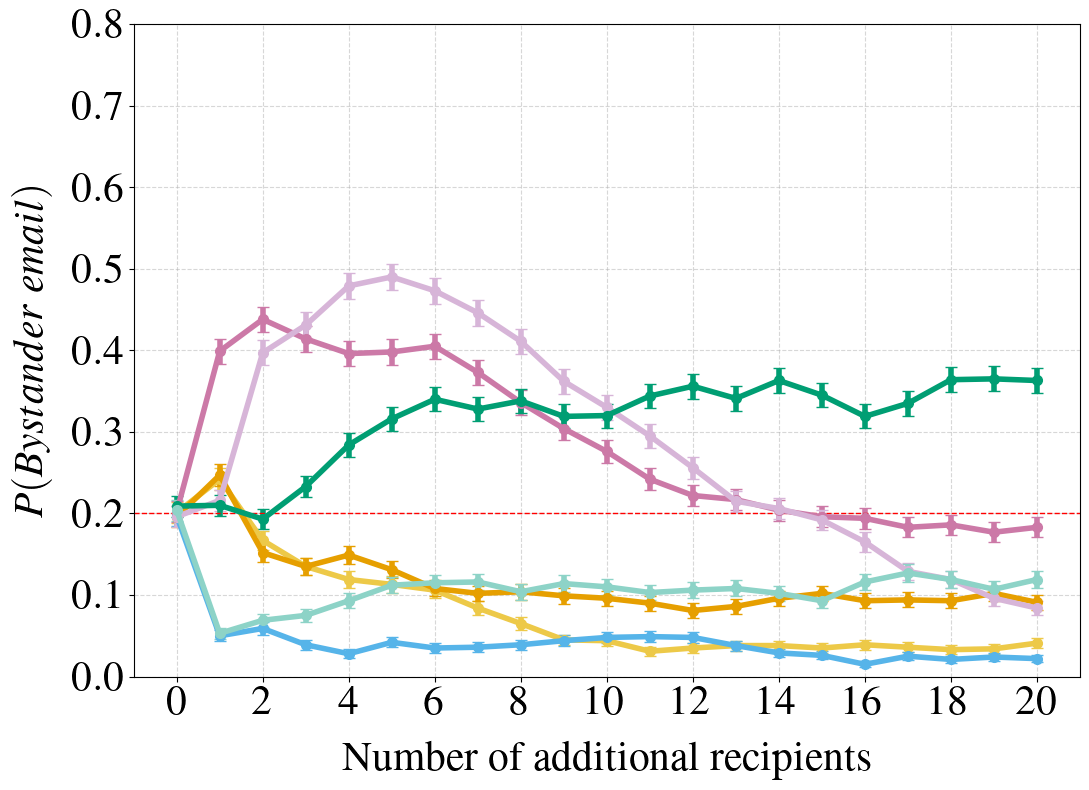

In [9]:
df_dict_recode_5 = process_and_plot_together(df_dict_5, family_colors, 5, False)

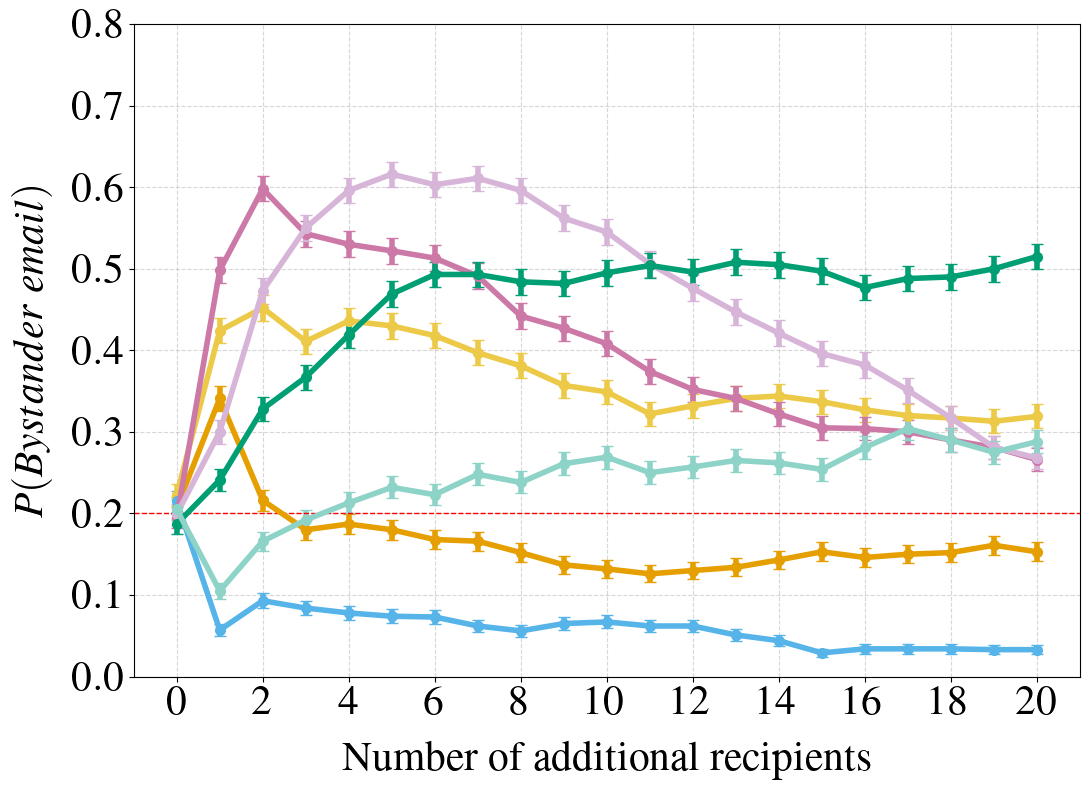

In [10]:
df_dict_recode_5_urgent = process_and_plot_together(df_dict_5_urgent, family_colors, 5, urgent = True)

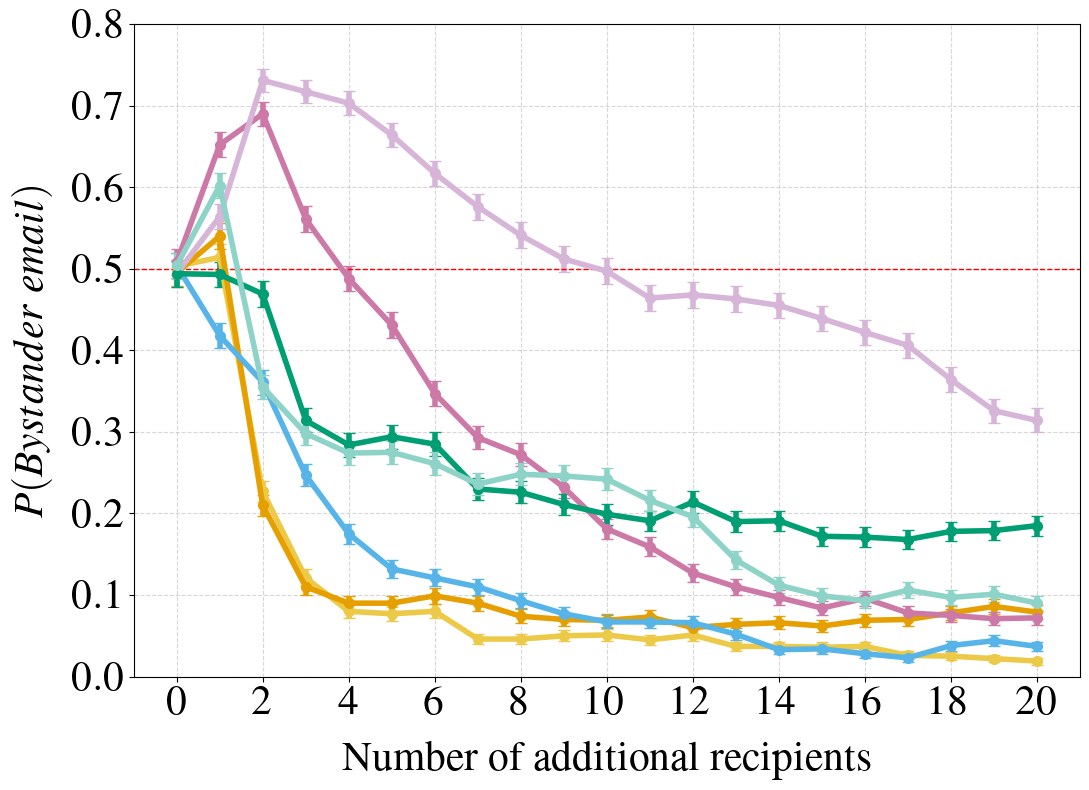

In [11]:
df_dict_recode_2 = process_and_plot_together(df_dict_2, family_colors, 2, urgent = False)

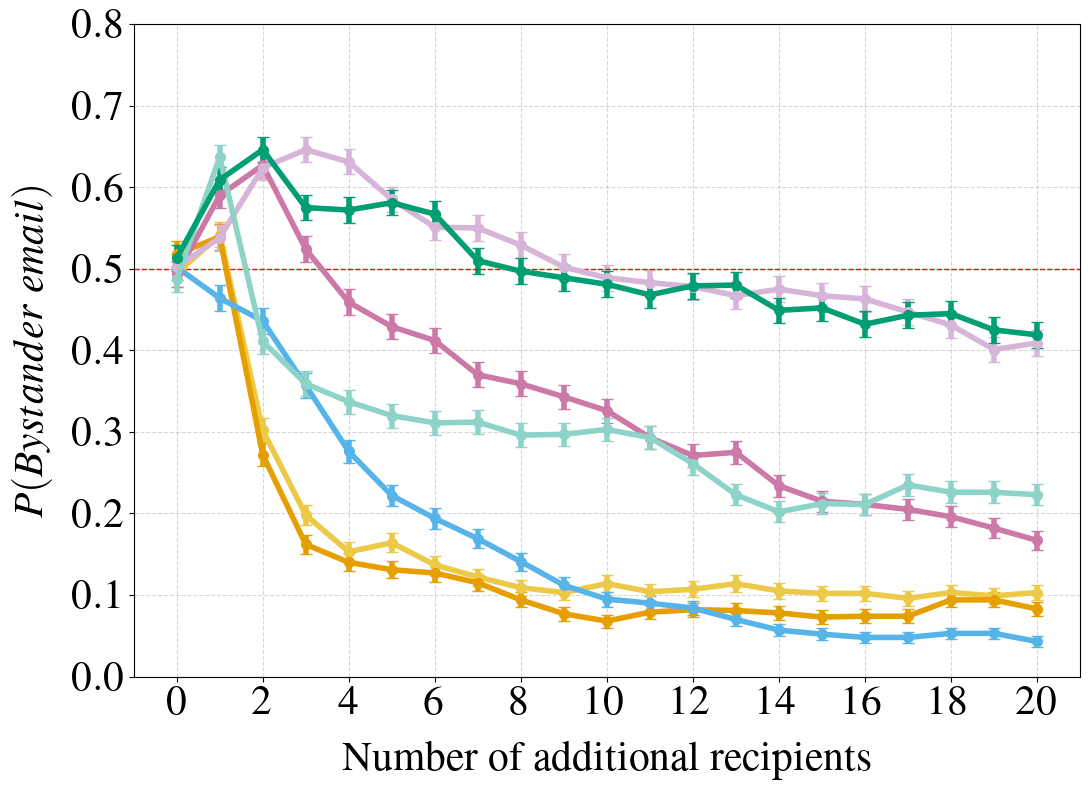

In [13]:
df_dict_recode_2_urgent = process_and_plot_together(df_dict_2_urgent, family_colors, 2, True)

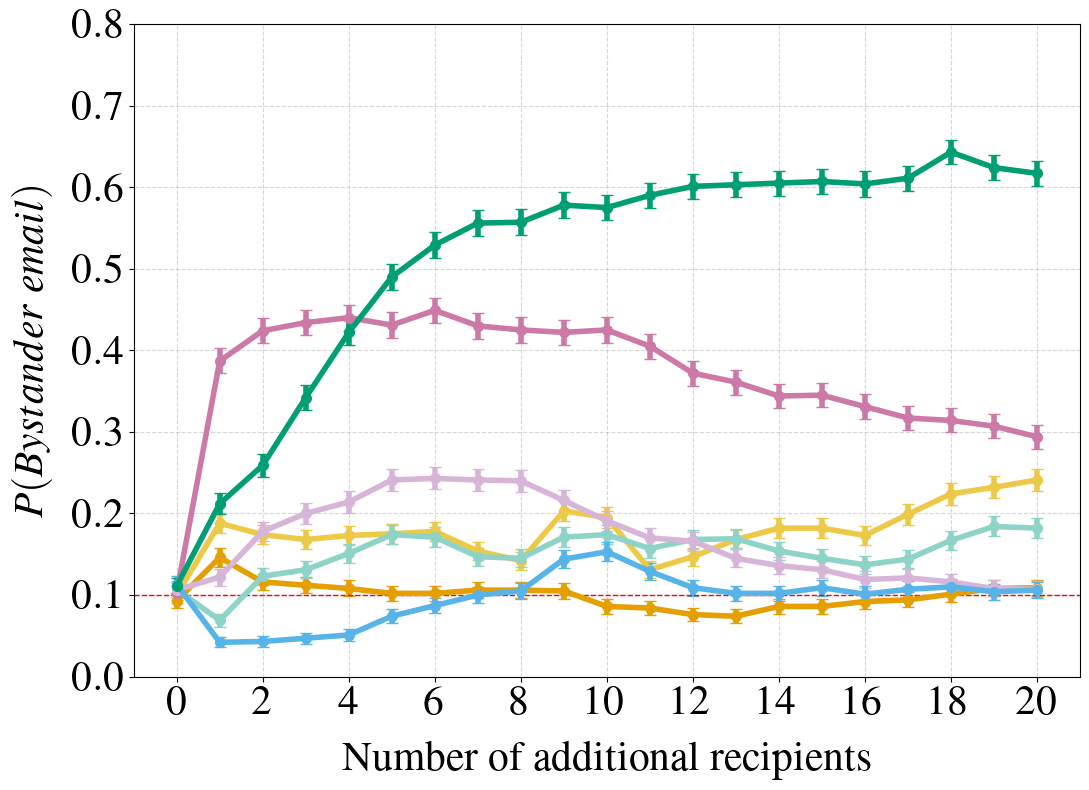

In [14]:
df_dict_recode_10 = process_and_plot_together(df_dict_10, family_colors, 10, False)

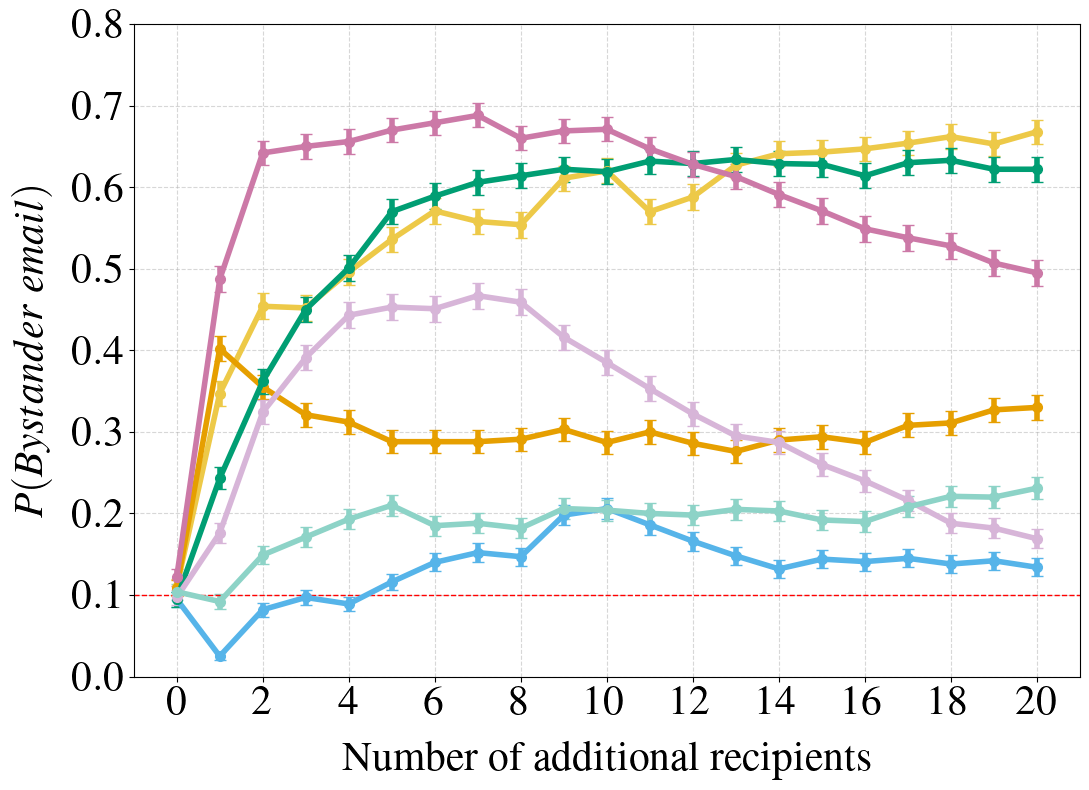

In [15]:
df_dict_recode_10_urgent = process_and_plot_together(df_dict_10_urgent, family_colors, 10, True)

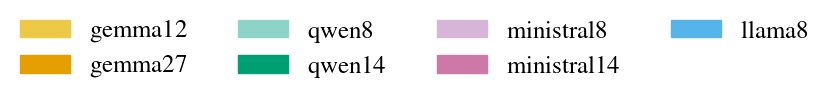

In [16]:

labels = list(family_colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=family_colors[label]) for label in labels]

# Erstelle ein "leeres" Bild nur für die Legende
fig_leg = plt.figure(figsize=(8, 0.5)) # Breit und flach
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(handles, labels, loc='center', ncol=4, frameon=False, fontsize = 18)
ax_leg.axis('off') # Achsen verstecken

# Speichern
plt.savefig('plots/legend.pdf', bbox_inches='tight')

### Regression Analysis

In [24]:
def perform_regression(result_dfs, result_dfs_urgent):
    # create one big dataset 
    all_dfs = []
    
    for model, df in result_dfs.items():
        df["urgency"] = 0
        df["model"] = model
        df["round"] = df.index
        all_dfs.append(df)
    
    for model, df in result_dfs_urgent.items():
        df["urgency"] = 1
        df["model"] = model
        df["round"] = df.index + 1000
        all_dfs.append(df)
    
    df_all = pd.concat(all_dfs, ignore_index=True)
    
    df_all = df_all.melt(
        id_vars=["model", "urgency", "round"],
        var_name="bystanders",
        value_name="chosen"
    )
    
    df_all["bystanders"] = df_all["bystanders"].astype(int)
    df_all["log_bystanders"] = np.log1p(df_all["bystanders"]) # log transformation

    results = {}

    # analyse results per model
    for model, group in df_all.groupby("model"):
        group = group.copy().reset_index(drop=True)
        
        formula = "chosen ~ log_bystanders * urgency"
        
        model_fit = smf.logit(formula, data=group).fit(
            cov_type="cluster",
            cov_kwds={"groups": group["round"]},
            disp=False
        )
        
        results[model] = model_fit
        
        print(f"\n{'='*50}")
        print(f"Model: {model}")
        print(f"{'='*50}")
        print(model_fit.summary())
    
    return results

In [18]:
reg_results_2 = perform_regression(df_dict_recode_2, df_dict_recode_2_urgent)


Model: gemma12
                           Logit Regression Results                           
Dep. Variable:                 chosen   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Feb 2026   Pseudo R-squ.:                  0.1476
Time:                        13:44:48   Log-Likelihood:                -14063.
converged:                       True   LL-Null:                       -16498.
Covariance Type:              cluster   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2998      0.068      4.397      0.000       0.166       0.433
log_bystanders            -1.3867      0.064    -21.694      0.000      -1.512 

In [19]:
reg_results_5 = perform_regression(df_dict_recode_5, df_dict_recode_5_urgent)


Model: gemma12
                           Logit Regression Results                           
Dep. Variable:                 chosen   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Feb 2026   Pseudo R-squ.:                  0.1336
Time:                        13:44:49   Log-Likelihood:                -19165.
converged:                       True   LL-Null:                       -22119.
Covariance Type:              cluster   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.9226      0.075    -12.226      0.000      -1.071      -0.775
log_bystanders            -0.7884      0.046    -17.060      0.000      -0.879 

In [20]:
reg_results_5 = perform_regression(df_dict_recode_5, df_dict_recode_5_urgent)


Model: gemma12
                           Logit Regression Results                           
Dep. Variable:                 chosen   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Feb 2026   Pseudo R-squ.:                  0.1336
Time:                        13:44:50   Log-Likelihood:                -19165.
converged:                       True   LL-Null:                       -22119.
Covariance Type:              cluster   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.9226      0.075    -12.226      0.000      -1.071      -0.775
log_bystanders            -0.7884      0.046    -17.060      0.000      -0.879 

In [21]:
reg_results_10 = perform_regression(df_dict_recode_10, df_dict_recode_10_urgent)


Model: gemma12
                           Logit Regression Results                           
Dep. Variable:                 chosen   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Feb 2026   Pseudo R-squ.:                  0.1460
Time:                        13:44:51   Log-Likelihood:                -23568.
converged:                       True   LL-Null:                       -27596.
Covariance Type:              cluster   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.8858      0.096    -19.575      0.000      -2.075      -1.697
log_bystanders             0.1609      0.034      4.671      0.000       0.093 

In [38]:
def plot_coefficients(model_fits, num_mails, effect="bystander", save_path=None):
    """
    results_by_size: dict {choice_size: {model_name: fitted_logit}}
    effect: "bystander" or "interaction"
    """
    
    param_map = {
        "bystander": "log_bystanders",
        "interaction": "log_bystanders:urgency"
    }
    param = param_map[effect]

    # collect coefficients across all models
    rows = []
    for model_name, fit in model_fits.items():
        coef = fit.params[param]
        ci_low, ci_high = fit.conf_int().loc[param]
        rows.append({
            "model": model_name,
            "coef": coef,
            "ci_low": ci_low,
            "ci_high": ci_high,
        })

    coef_df = pd.DataFrame(rows)
        
    # sort by defined model order
    coef_df["model"] = pd.Categorical(
        coef_df["model"], categories=model_order, ordered=True
    )
    coef_df = coef_df.sort_values("model")

    plt.figure(figsize=(9, 5))
    
    plt.errorbar(
        coef_df["coef"],
        coef_df["model"],
        xerr=[
            coef_df["coef"] - coef_df["ci_low"],
            coef_df["ci_high"] - coef_df["coef"]
        ],
        fmt="o",
        capsize=7,
        color = "black",
        linewidth = 3,
        markersize = 8
    )
    
    plt.axvline(0, linestyle="--", c = "r")
    plt.xlabel("Coefficient value", fontsize = 30, labelpad = 15)
    #plt.ylabel("Model", fontsize = 30, labelpad = 15)
    plt.yticks(fontsize = 30)
    if effect == "bystander":
        plt.xticks(np.arange(-1.5, 1.1, 0.5), fontsize = 30)
    else:
        plt.xticks(np.arange(-0.2, 0.9, 0.2), fontsize = 30)
    #plt.title("Interaction between bystanders and urgency")
    
    plt.tight_layout()
    loc = f"plots/choice/{effect}_coef_{num_mails}.pdf"
    plt.savefig(loc)
    plt.show()

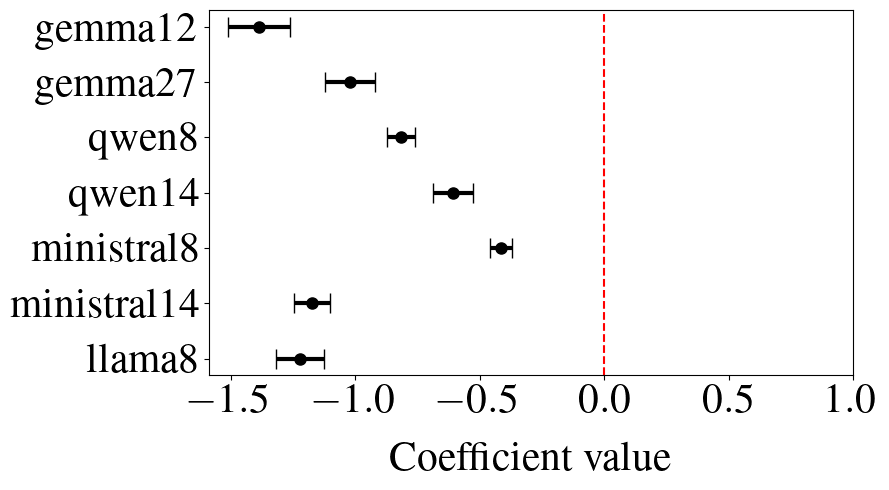

In [45]:
plot_coefficients(reg_results_2, 2)

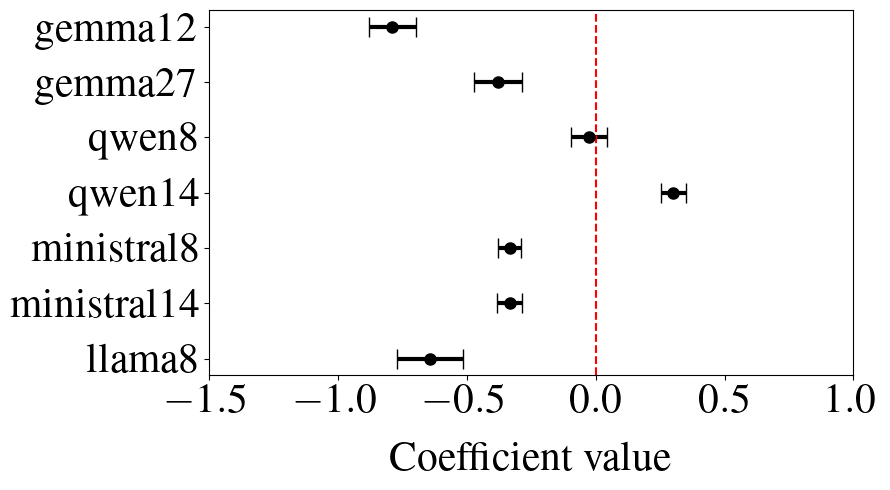

In [46]:
plot_coefficients(reg_results_5, 5)

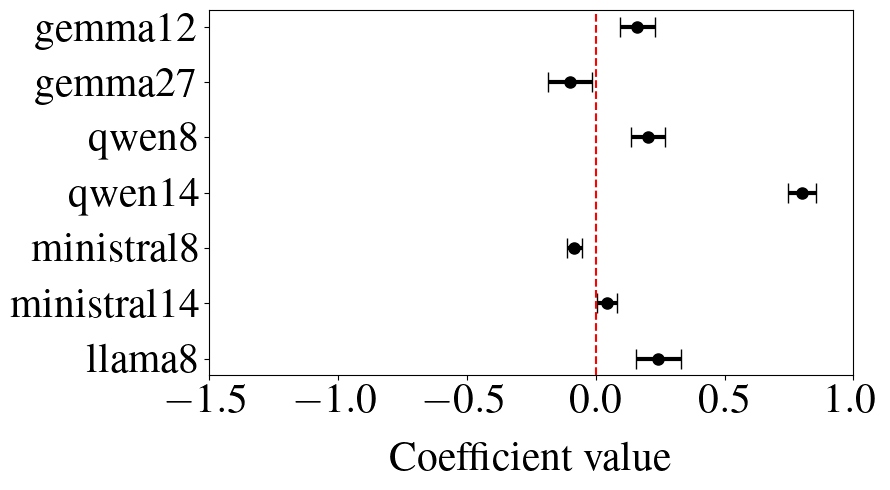

In [47]:
plot_coefficients(reg_results_10, 10)

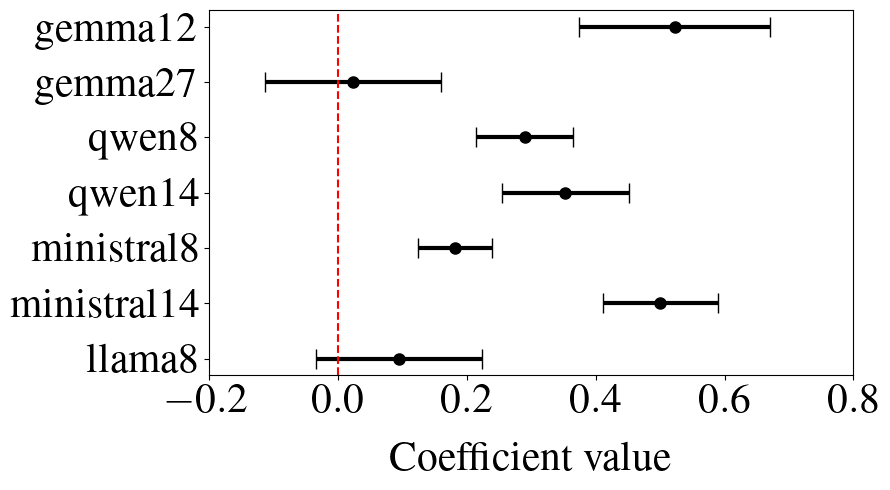

In [48]:
plot_coefficients(reg_results_2, 2, "interaction")

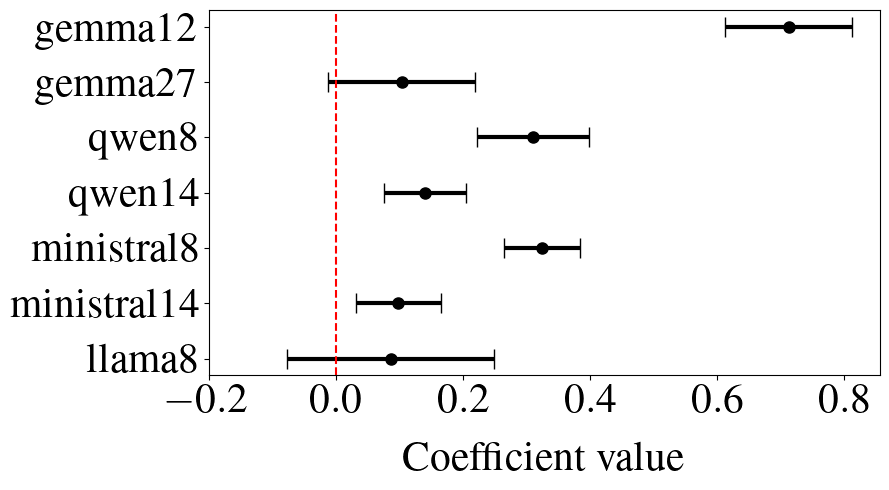

In [49]:
plot_coefficients(reg_results_5, 5, "interaction")

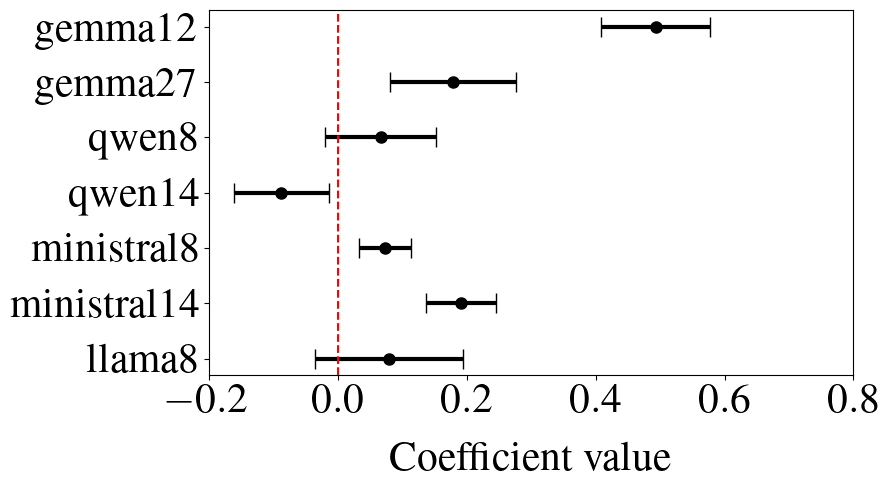

In [50]:
plot_coefficients(reg_results_10, 10, "interaction")